### instar crawling

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np

In [48]:
ser = Service('../chrome_dirver/chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [49]:
url = 'https://www.instagram.com/?hl=ko'
driver.get(url)

In [5]:
def insta_search(word):
    url ='https://www.instagram.com/explore/tags/{}/'.format(word)
    #url = 'https://www.instagram.com/explore/tags/'+word
    return url

In [6]:
word = '제주도맛집'
url = insta_search(word)
url

'https://www.instagram.com/explore/tags/제주도맛집/'

In [8]:
from selenium.webdriver.common.by import By

In [10]:
def select_first(driver):
    first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
    first.click()
    time.sleep(3)
    
select_first(driver)

In [11]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')
soup.head()

[<meta charset="utf-8"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <title>#제주도맛집 해시태그 • Instagram 사진 및 동영상</title>,
 <meta content="noimageindex, noarchive" name="robots"/>,
 <meta content="default" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="yes" name="mobile-web-app-capable"/>,
 <meta content="#ffffff" name="theme-color"/>,
 <meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover" id="viewport" name="viewport"/>,
 <link href="/data/manifest.json" rel="manifest"/>,
 <link as="style" crossorigin="anonymous" href="/static/bundles/es6/ConsumerUICommons.css/b3fdee5bd8e2.css" rel="preload" type="text/css"/>,
 <link as="style" crossorigin="anonymous" href="/static/bundles/es6/Consumer.css/13f5b6196ff4.css" rel="preload" type="text/css"/>,
 <link as="style" crossorigin="anonymous" href="/static/bundles/es6/FeedPageContainer.css/fe2f77f2b145.css" rel="preload" type="text/css"/>,
 <link as="style" crossorigin

In [12]:
import unicodedata

content = soup.select('div.C4VMK > span')[0].text
# countent = unicodedata.normalize('NFC',content) << MAC 운영체제일 경우

content

'(광고) 돈까스 환장하는 사람들 다 드루와~드루와~🤩🥩핵가성비&맛 까지 잡은 대왕 도마호크 돈까스 맛집 점심메뉴로 추천~~🤭(먹으면 저녁까지 배부른거 실화?)화덕&그릴 요리맛집이라 화덕피자,파스타등 대부분 요리가 맛있고 와인이 가득한 셀러가 있어서저녁에는 분위기 좋게 한잔하기 좋음🍷🧭 화덕앤그릴🗺 제주 제주시 국기로 23 📞 010-4068-9870#제주도맛집 #제주맛집#신제주맛집#노형맛집#노형동맛집#노형맛집추천#제주도돈까스#제주도돈까스맛집#제주파스타#제주파스타맛집#제주피자#제주피자맛집#제주와인#제주와인바#제주점심'

In [13]:
import re

tags = re.findall(r'#[^\s#,\\]+',content)
tags

['#제주도맛집',
 '#제주맛집',
 '#신제주맛집',
 '#노형맛집',
 '#노형동맛집',
 '#노형맛집추천',
 '#제주도돈까스',
 '#제주도돈까스맛집',
 '#제주파스타',
 '#제주파스타맛집',
 '#제주피자',
 '#제주피자맛집',
 '#제주와인',
 '#제주와인바',
 '#제주점심']

In [20]:
date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
date

'2022-01-17'

In [28]:
like = soup.select('a.zV_Nj')[0].text
like

''

In [32]:
place = soup.select('a.O4GlU')
place

[]

In [33]:
def get_contents(driver):
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')
    
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC',content)
    except:
        content = ""
    
    try :
        tags = re.findall(r'#[^\s#,\\]+',content)
    except:
        tags =""
        
    date = soup.select('time')[0]['datetime'][:10]
    
    try:
        like = soup.select('a.zV_Nj > span')[0].text
    except :
        like = 0
    
    try:
        place = soup.select('a.O4GlU')[0].text
        place = unicodedata.normalize('NFC',place)
    except:
        place = ""
        
    data = [content, date, like, place, tags]
    
    return data

In [47]:
get_contents(driver)

WebDriverException: Message: chrome not reachable
  (Session info: chrome=97.0.4692.71)
Stacktrace:
Backtrace:
	Ordinal0 [0x00E7FDC3+2555331]
	Ordinal0 [0x00E177F1+2127857]
	Ordinal0 [0x00D12CD0+1060048]
	Ordinal0 [0x00D07BE2+1014754]
	Ordinal0 [0x00D083E8+1016808]
	Ordinal0 [0x00D09C02+1022978]
	Ordinal0 [0x00D03AB9+998073]
	Ordinal0 [0x00D14040+1065024]
	Ordinal0 [0x00D66DC2+1404354]
	Ordinal0 [0x00D57976+1341814]
	Ordinal0 [0x00D336B6+1193654]
	Ordinal0 [0x00D34546+1197382]
	GetHandleVerifier [0x01019622+1619522]
	GetHandleVerifier [0x010C882C+2336844]
	GetHandleVerifier [0x00F123E1+541697]
	GetHandleVerifier [0x00F11443+537699]
	Ordinal0 [0x00E1D18E+2150798]
	Ordinal0 [0x00E21518+2168088]
	Ordinal0 [0x00E21660+2168416]
	Ordinal0 [0x00E2B330+2208560]
	BaseThreadInitThunk [0x7676FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77D37A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77D37A6E+238]


In [39]:
def move_next(driver):
    right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
    right.click()
    time.sleep(3)

In [41]:
move_next(driver)

In [50]:
def insta_crawling(word, n):
    url = insta_search(word)
    
    driver.get(url)
    time.sleep(5)
    
    select_first(driver)
    time.sleep(5)
    
    #target = n
    results = []
    
    for i in range(n):
        try:
            data = get_contents(driver)
            results.append(data)
            move_next(driver)
        except:
            time.sleep(2)
            move_next(driver)
            
    return results

In [51]:
results = insta_crawling('제주도맛집',5)
results

[['(광고) 돈까스 환장하는 사람들 다 드루와~드루와~🤩🥩핵가성비&맛 까지 잡은 대왕 도마호크 돈까스 맛집 점심메뉴로 추천~~🤭(먹으면 저녁까지 배부른거 실화?)화덕&그릴 요리맛집이라 화덕피자,파스타등 대부분 요리가 맛있고 와인이 가득한 셀러가 있어서저녁에는 분위기 좋게 한잔하기 좋음🍷🧭 화덕앤그릴🗺 제주 제주시 국기로 23 📞 010-4068-9870#제주도맛집 #제주맛집#신제주맛집#노형맛집#노형동맛집#노형맛집추천#제주도돈까스#제주도돈까스맛집#제주파스타#제주파스타맛집#제주피자#제주피자맛집#제주와인#제주와인바#제주점심',
  '2022-01-17',
  0,
  '',
  ['#제주도맛집',
   '#제주맛집',
   '#신제주맛집',
   '#노형맛집',
   '#노형동맛집',
   '#노형맛집추천',
   '#제주도돈까스',
   '#제주도돈까스맛집',
   '#제주파스타',
   '#제주파스타맛집',
   '#제주피자',
   '#제주피자맛집',
   '#제주와인',
   '#제주와인바',
   '#제주점심']],
 ['#그날의기억방법 아기자기 귀여운 ‘세모 제주’동쪽 구좌읍 행원리에 주먹밥 테이크아웃점제주 재료들로 만든 음식이라서더 신선하고 맛있더라구요ㅎㅎㅎ외관도 너무 귀엽고 주먹밥도 귀여워서또 다시 생각나는 곳입니다☺️제주 여행에 출출할때 잠깐 들려서간단히 먹기 좋습니다!주말 잘 마무리하세요😌<제주 제주시 구좌읍 행원로 121>',
  '2022-01-16',
  '7,616',
  '세모제주',
  ['#그날의기억방법']],
 ['.❤제주 인스타 감성스팟!❤제주에서 요기가서 막찍어도인생샷을 건질수있다는곳들을모아봤어!! 여기가서 한번 찰칵 해보고 인스타에 업로드 기기!!@찍어줄 친구소환!!!..#제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월맛집 #중문맛집 #제주공항맛집 #서귀포맛집 #산방산맛집 #신제주맛집 #제주시청맛집 #제주애월맛집 #월정리맛집 #제주여행 #제주핫플',
  '2022-01-16',
  '1,492',
  '',
  ['

---

### 지도 시각화

In [4]:
raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')

raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [5]:
location_counts = raw_total['place'].value_counts()

type(location_counts)

pandas.core.series.Series

In [6]:
location_counts_df = pd.DataFrame(location_counts)
type(location_counts_df)
location_counts_df.head()

,place
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59


In [7]:
locations = list(location_counts_df.index)
type(locations)

list

In [8]:
## 카카오개발 지도앱 사용하기
## 내 애플리케이션 > REST API key

In [9]:
!pip install requests

In [10]:
import requests

In [64]:
searching = '합정 스타벅스'
url = 'http://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
url

'http://dapi.kakao.com/v2/local/search/keyword.json?query=합정 스타벅스'

In [86]:
headers = {
    "Authorization": "KakaoAK **************"
}
places = requests.get(url, headers = headers).json()['documents']

print(places[1]['place_name'])
print('경도 = ',places[1]['x'])
print('위도 = ',places[1]['y'])

스타벅스 합정점
경도 =  126.91253700818196
위도 =  37.54994959743763


In [11]:
def find_places(searching):
    url = 'http://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
    "Authorization": "KakaoAK **************"
    }
    places = requests.get(url, headers = headers).json()['documents']
    
    place = places[0]
    
    name = place['place_name']
    
    x = place['x']
    y = place['y']
    
    data = [name, x, y, searching]
    
    return data

In [95]:
find_places('레알라면')

['레알라면', '127.05534663625235', '37.591086837231735', '레알라면']

3

In [12]:
locations_inform = []

for location in locations[:20]:
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
    
locations_inform

[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['바이나흐튼 크리스마스박물관', '126.32785786016811', '33.2915720831759', '제주도 크리스마스 박물관'],
 ['할로비치 본점', '126.2815248933638', '33.30832616522123', '할로비치'],
 ['제주에인감귤밭', '126.5390139270361', '33.25656069063887', '제주에인감귤밭'],
 ['제주도', '126.54587355630036', '33.379777816446165', 'Jeju Island'],
 ['한라산1100고지', '126.462219691112', '33.3580781709788', '1100고지'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['고집돌우럭 중문점', '126.416704762779', '33.2579811121134', '고집돌우럭중문점'],
 ['석부작박물관', '126.536501983154', '33.2504031491774', '석부작박물관'],
 ['올레길 16코스(고내-광령 올레)', '126.38979561557086', '33.46649759191228', '제주도 애월읍'],
 ['알뜨르비행장', '126.271527320164', '33.2047161778831', '알뜨르 비행장'],
 ['카멜리아힐', '126.370009467525', '33.2896344311608', '카멜리아 힐'],
 ['제주레포츠랜드', '126.6387551242765', '33.48206819907232', '제주레포츠랜드'],
 ['유진푸드', '127.387893413315', '36.3562604784963', '밥깡패']

In [2]:
! pip install tqdm

In [17]:
from tqdm.notebook import tqdm
# running 진행상황을 시각화

In [18]:
locations_inform = []

for location in tqdm(locations[:200]):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
    
locations_inform

  0%|          | 0/200 [00:00<?, ?it/s]

[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['바이나흐튼 크리스마스박물관', '126.32785786016811', '33.2915720831759', '제주도 크리스마스 박물관'],
 ['할로비치 본점', '126.2815248933638', '33.30832616522123', '할로비치'],
 ['제주에인감귤밭', '126.5390139270361', '33.25656069063887', '제주에인감귤밭'],
 ['제주도', '126.54587355630036', '33.379777816446165', 'Jeju Island'],
 ['한라산1100고지', '126.462219691112', '33.3580781709788', '1100고지'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['고집돌우럭 중문점', '126.416704762779', '33.2579811121134', '고집돌우럭중문점'],
 ['석부작박물관', '126.536501983154', '33.2504031491774', '석부작박물관'],
 ['올레길 16코스(고내-광령 올레)', '126.38979561557086', '33.46649759191228', '제주도 애월읍'],
 ['알뜨르비행장', '126.271527320164', '33.2047161778831', '알뜨르 비행장'],
 ['카멜리아힐', '126.370009467525', '33.2896344311608', '카멜리아 힐'],
 ['제주레포츠랜드', '126.6387551242765', '33.48206819907232', '제주레포츠랜드'],
 ['유진푸드', '127.387893413315', '36.3562604784963', '밥깡패']

In [19]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_office','경도','위도','name']
locations_inform_df.head()

,name_office,경도,위도,name
0,Jeju in aA,126.83650369902168,33.53833652360498,Jeju
1,서귀포잠수함,126.558616052674,33.2393033784206,Seogwipo
2,바이나흐튼 크리스마스박물관,126.32785786016811,33.2915720831759,제주도 크리스마스 박물관
3,할로비치 본점,126.2815248933638,33.30832616522123,할로비치
4,제주에인감귤밭,126.5390139270361,33.25656069063887,제주에인감귤밭


In [23]:
location_counts_df = pd.read_excel('./files/3_location_counts.xlsx', index_col=0)
location_inform_df = pd.read_excel('./files/3_locations.xlsx')

print(location_counts_df.head())
print('\n')
print(location_inform_df.head())

                      place
Jeju                    271
Jeju-do                 179
Jungle Book by Alice    108
Seogwipo                 66
제주도 크리스마스 박물관            59


    name_official          경도         위도         인스타위치명
0      Jeju in aA  126.836504  33.538337           Jeju
1          서귀포잠수함  126.558616  33.239303       Seogwipo
2  바이나흐튼 크리스마스박물관  126.327864  33.291569  제주도 크리스마스 박물관
3            할로비치  127.020826  37.518211           할로비치
4         제주에인감귤밭  126.539410  33.256610        제주에인감귤밭


In [24]:
location_data = pd.merge(location_inform_df,
                        location_counts_df, how = 'inner',
                        left_on = 'name_official',
                         right_index = True)
location_data

,name_official,경도,위도,인스타위치명,place
1,서귀포잠수함,126.558616,33.239303,Seogwipo,1
308,서귀포잠수함,126.558616,33.239303,서귀포잠수함,1
3,할로비치,127.020826,37.518211,할로비치,51
4,제주에인감귤밭,126.539410,33.256610,제주에인감귤밭,48
5,제주도,126.545876,33.379777,Jeju Island,4
...,...,...,...,...,...
829,리치망고 협재점,126.251784,33.402414,리치망고 협재점,1
831,독개물항,126.251613,33.401890,독개물항,1
833,카페오드리,126.297366,33.356905,카페오드리,1
837,배블리컨테이너,126.793483,33.556761,배블리컨테이너,1


In [29]:
location_data['name_official'].value_counts()

오설록티뮤지엄           3
서귀포잠수함            2
천지연폭포             2
빌라드아토             2
비자림               2
                 ..
투썸플레이스 제주애월한담점    1
하늘고래              1
문쏘                1
성산일출봉             1
신풍목장              1
Name: name_official, Length: 416, dtype: int64

In [34]:
location_data = location_data.pivot_table(values = 'place',
                         index = ['name_official','경도','위도'],
                         aggfunc = 'sum')
location_data = location_data.sort_values(by = 'place', ascending = False)
location_data

,,,place
name_official,경도,위도,
할로비치,127.020826,37.518211,51
제주에인감귤밭,126.539410,33.256610,48
석부작박물관,126.536502,33.250403,36
위미동백나무군락,126.674731,33.272939,18
밥깡패,126.263436,33.410093,16
...,...,...,...
산방산,126.313425,33.241304,1
사이카레,126.381107,33.484245,1
사락,126.307741,33.228771,1


In [35]:
!pip install folium

In [36]:
import folium

---
folium 모듈 써보기
(지도, 위치 시각화)

In [53]:
# 기본 좌표
latitude = 37.58044082275964
longtitude = 127.06872704456588
#37.58044082275964, 127.06872704456588
m = folium.Map(location = [latitude, longtitude],
               width = 700, 
               high = 500,
               zoom_start = 15)

folium.Marker(location = [latitude, longtitude],
              popup = '12층',
              tooltip = '장안현대아파트',
              icon = folium.Icon(color = 'gray',
                                #icon_color = 'blue',
                                icon = 'home',
                                prefix = 'fa')).add_to(m)

folium.CircleMarker(location = [latitude, longtitude],
                   color = 'tomato',
                   radius = 50,
                   tooltip = '활동반경').add_to(m)
m

---

In [55]:
location_data = pd.read_excel('./files/3_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_official  416 non-null    object 
 1   경도             417 non-null    float64
 2   위도             417 non-null    float64
 3   place          417 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB


In [59]:
import folium

Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla,
                     zoom_start = 10)

#https://deparkes.co.uk/2016/06/10/folium-map-tiles/
#folium.TileLayer('stamenwatercolor').add_to(map_jeju)

for i in range(len(location_data)): # 417
    name = location_data['name_official'][i]
    count = location_data['place'][i]
    size = int(count*2)
    lng = location_data['경도'][i]
    lat = location_data['위도'][i]
    folium.CircleMarker(location = [lat,lng],
                       radius = size,
                       color = 'red',
                       popup = name).add_to(map_jeju)

    
map_jeju

In [104]:
from folium.plugins import MarkerCluster

locations = []
names = []

for i in range(len(location_data)):
    data =location_data.iloc[i]
    locations.append([data['위도'], data['경도']])
    names.append(data['name_official'])
    
#print(names)

Mt_Hanla = [33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)

tiles = ['stamenwatercolor','cartodbpositron',
         'openstreetmap','stamenterrain']

for tile in tiles:
    folium.TileLayer(tile).add_to(map_jeju2)

    
marker_cluster = MarkerCluster(locations = locations,
                              popups = names,
                              name = 'Jeju',
                              overlay = True,
                              control = True
                              )

marker_cluster.add_to(map_jeju2)

folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [101]:
## 특정 단어 게시글 찾기
raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [109]:
select_word = '해돋이'

check_list = []

for content in raw_total['content']:
    if select_word in content:
        check_list.append(True)
    else:
        check_list.append(False)
        
select_df = raw_total[check_list]
select_df

,content,date,like,place,tags
34,..“쿠룽쿠룽 해트맨 마씸!”.제주방언으로 ‘쿨쿨 자던 해가 떴습니다’.다사다난 했...,2019-01-01,89,서귀포 법환포구,[]
73,아듀 2018!🤧👋🏻2019🐷황금돼지해의 첫 일출🌅을 만나볼 수 있는 제주 일출명소...,2018-12-31,18,Jeju-do,"['#제주', '#제주도', '#서귀포', '#제주도민', '#제주여행', '#제주..."
142,4일간 휴 ~ 뭐하지? ㅠ 뭐할까?. #해넘이#해돋이 어디로가지? .누워서보는극장?...,2018-12-28,94,NaN,"['#해넘이', '#해돋이', '#제주', '#jejudo', '#jeju', '#..."
441,순간포착엄청 놀랐네요갑자기 새들이 무더기로 나타나서날아오르길래 ㆍ그쪽에 무슨일 있는...,2018-12-18,77,제주프레임스파빌,"['#제주도공항', '#프레임펜션', '#프레임스파빌', '#제주', '#제주프레임..."
2458,해돋이#제주 #혼저옵서예 #제주스타그램 #제주도 #제주여행 #제주관광 #제주도여행 ...,2018-10-23,81,NaN,"['#제주', '#혼저옵서예', '#제주스타그램', '#제주도', '#제주여행', ..."
3943,곽지스테이션안녕 반가워..2019년...붉은해의 기운을 받으세요. 얍얍얍!!!..#...,2019-01-01,31,곽지스테이션,"['#곽지스테이션', '#곽지해수욕장', '#해돋이', '#2019', '#기해년'..."
4635,제주에서 마지막 밥은...해물라면구름낀 날씨에 전국에서 제주빼고 다 보였다는 해돋이...,2019-01-01,13,NaN,"['#제주도', '#제주도맛집', '#성산일출봉맛집', '#제주경미네', '#경미네..."
4715,#제주 를 제외한 전국에서 해돋이를 볼수 있....에서의 그 제주.... 포기하고 ...,2019-01-01,45,광치기해변,"['#제주', '#호텔', '#빼꼼']"
5112,사장님 아침 대바람부터 문열어 주셔서 감사해요 ㅋㅋㅋㅋ 참 친절하셔요 또 방문 하고...,2019-01-01,114,Woljeongri Beach,"['#월정리', '#월정리해변', '#월정리맛집', '#밥세끼', '#제주도맛집',..."
5248,#어부피자 #2018년 찾아주셔서 #감사합니다#2019년도 더 더욱 #노력하는 어부...,2018-12-31,35,NaN,"['#어부피자', '#2018년', '#감사합니다', '#2019년도', '#노력하..."


In [111]:
for i in select_df.index:
    print(select_df.loc[i,'content'])
    print('-'*50)

..“쿠룽쿠룽 해트맨 마씸!”.제주방언으로 ‘쿨쿨 자던 해가 떴습니다’.다사다난 했던 무술년을 보내고 기해년의 새로운 기운을 얻고자박물관에서 5분거리 법환포구로 해돋이를 보러 나왔어요..새해의 떠오르는 태양의 기운 듬뿍받으시고 올 해 모든 분들의 가정에행복과 웃음이 가득하시길 바랍니다....🌿제주의 자연을 고스란히 담은제주형 생태 야생화 정원 [석부작 박물관].🌿친환경 감성 힐링 스테이[서귀포 귤림성]
--------------------------------------------------
아듀 2018!🤧👋🏻2019🐷황금돼지해의 첫 일출🌅을 만나볼 수 있는 제주 일출명소❣️. #제주 #제주도 #서귀포 #제주도민 #제주여행 #제주도여행 #제주관광지 #제주관광 #제주핫플 #제주핫플레이스 #선팔 #맞팔 #2019 #HAPPYNEWYEAR #새해 #새해일출 #성산일출봉 #송악산 #광치기해변 #한라산 #용눈이오름 #해돋이 #좋아요 #jeju #여행스타그램 #제주스타그램 #제주그램 #여행에미치다 #쿠폰트리 #쿠폰트리투어
--------------------------------------------------
4일간 휴 ~ 뭐하지? ㅠ 뭐할까?. #해넘이#해돋이 어디로가지? .누워서보는극장? 😅혼자 눕는 자리는 있을까? 😅😭.#제주#jejudo#jeju#jejuisland#제주관광#제주여행#한라산#일출#노을#sunset#sunrise#yolo#소확행#lighthouse#제주버스여행#제주도여행#제주살이#제주오름#제주올레길#한라산둘레길#올레길
--------------------------------------------------
순간포착엄청 놀랐네요갑자기 새들이 무더기로 나타나서날아오르길래 ㆍ그쪽에 무슨일 있는줄ᆢ그래도  순간 촬영도하고재미도있었어요^^#제주도공항#프레임펜션#프레임스파빌#제주#제주프레임펜션#제주프레임스파빌#제주도#제주여행#제주도여행#제주관광#제주도관광#제주인기펜션#제주도인기펜션#제주추천#추천제주#겨울제주#제주겨울#겨울여행#구세군#크리스마스#크리스마스선

---
엑셀 파일에서 특정 키워드만을 받아서
정렬해주는 함수를 만들어보자
---

In [112]:
def find_words(excel, word):
    data = pd.read_excel('./files/{}.xlsx'.format(excel))
    check_list = []
    
    for content in data['content']:
        if word in content:
            check_list.append(True)
        else:
            check_list.append(False)
        
    select_df = raw_total[check_list]
    return select_df

In [117]:
find_words('1_crawling_raw','알파카')

,content,date,like,place,tags
991,10번삐진 소윤이 언니랑 채린이랑😘#13개월아기 #닭띠아기 #제주관광 #화조원 #애...,2018-12-01,51,NaN,"['#13개월아기', '#닭띠아기', '#제주관광', '#화조원', '#애월핫플레이..."
1638,페라가모 알파카 망또겸 목도리.#제주빈티지샵#제주빈티지#제주관광#제주여행#제주가볼곳...,2018-11-14,22,NaN,"['#제주빈티지샵', '#제주빈티지', '#제주관광', '#제주여행', '#제주가볼..."
1775,#앵무새부터 독수리#부엉이#알파카#조류의왕국🐦애들이 좋아하긴 한데 #체력이_방전🐽#...,2018-11-11,44,제주 조류공원 화조원,"['#앵무새부터', '#부엉이', '#알파카', '#조류의왕국🐦애들이', '#체력이..."
2208,알파카의 매력에 빠져부렀당 #개똥이네동물원 #동물원 #알파카 #먹이주기체험 #제주관...,2018-10-29,16,NaN,"['#개똥이네동물원', '#동물원', '#알파카', '#먹이주기체험', '#제주관광']"
2211,알파카의 매력에 빠져부렀당 #개똥이네동물원 #동물원 #알파카 #먹이주기체험 #제주관광,2018-10-29,11,NaN,"['#개똥이네동물원', '#동물원', '#알파카', '#먹이주기체험', '#제주관광']"
2360,매일매일 입고 싶은알파카 핸드메이드 코트💛........#제주 #제주린다 #린다스타...,2018-10-25,44,NaN,"['#제주', '#제주린다', '#린다스타일', '#데일리룩', '#핸드메이드코트'..."
7856,#제주여행 #jeju #제주 #2019 #10살 #급여행 #여행스타그램 #브릭캠퍼스...,2019-01-01,10,Jeju-do,"['#제주여행', '#jeju', '#제주', '#2019', '#10살', '#급..."
8287,🍊🍊감귤따기🍊🍊..#개똥이네동물원#감귤체험 #🍊#생귤탱귤#장겁쟁 씨는 알파카가 손을...,2019-01-01,39,개똥이네 동물원,"['#개똥이네동물원', '#감귤체험', '#🍊', '#생귤탱귤', '#장겁쟁', '..."
8414,화조원에 눈이 내렸어요.하얀눈과 빨간 동백꽃이 눈길을 사로잡네요~화조원에서 겨울을 ...,2019-01-01,38,제주 조류공원 화조원,"['#화조원', '#제주', '#애월', '#여행', '#동물', '#동물농장', ..."


---

In [118]:
def select_word(select_word_list):
    for select_word in select_word_list:
        check_list = []
        for content in raw_total['content']:
            if select_word in content:
                check_list.append(True)
            else:
                check_list.append(False)
                
        select_df = raw_total[check_list]
        fpath = './files/4_select_data_{}_class.xlsx'.format(select_word)
        select_df.to_excel(fpath, index = False)

In [119]:
select_word_list = ['해돋이','박물관','힐링','게스트하우스','섭지코지']
select_word(select_word_list)

---

In [123]:
import wordcloud

In [125]:
raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [127]:
raw_total['tags'][:10]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
3    ['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'...
4    ['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추...
5    ['#제주에인감귤밭', '#감귤체험', '#귤따기체험', '#체험농장', '#감귤따...
6    ['#제주에인감귤밭', '#감귤체험', '#귤따기체험', '#체험농장', '#감귤따...
7    ['#niceweather', '#winterswimming', '#제주', '#바...
8              ['#제주에서한복입고여행하기', '#한복입는선흘집', '#파스텔제주']
9    ['#레드향', '#천혜향', '#한라봉', '#귤오름농원', '#귤농장', '#과...
Name: tags, dtype: object

In [130]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tags in tags_list:
        tags_total.append(tags)
        
tags_total[:10]

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집']

In [135]:
from collections import Counter
tags_counts_selected = Counter(tags_total)

tags_counts_selected.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [136]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import platform

In [137]:
font_path = 'c://Windows/Fonts/malgun.ttf'

In [154]:
STOPWORDS = ['#일상','#선팔','#제주도','#jeju','#반영구','#제주자연눈썹',
            '#서귀포눈썹문신','#제주눈썹문신','#소통','#맞팔','#제주속눈썹',
            '#제주일상','#여행스타그램','#눈썹문신','#여행',
            '#서귀포반영구','#서귀포속눈썹','#제주남자눈썹문신',
            '#서귀포자연눈썹','#서귀포남자눈썹문신','#카멜리아힐',"''"]

tag_total_selected = []

for tag in tags_total:
    if not tag in STOPWORDS:
        tag_total_selected.append(tag)
        
tags_counts_selected = Counter(tag_total_selected)
tags_counts_selected.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#제주스타그램', 432),
 ('#애월맛집', 410),
 ('#제주메이크업', 388),
 ('#제주시맛집', 387),
 ('#중문흑돼지맛집', 377),
 ('#daily', 362),
 ('#제주도여행코스', 361),
 ('#가족여행', 357),
 ('#제주도카페', 354),
 ('#jejuisland', 348),
 ('#제주속눈썹연장', 343),
 ('#성산맛집', 342)]

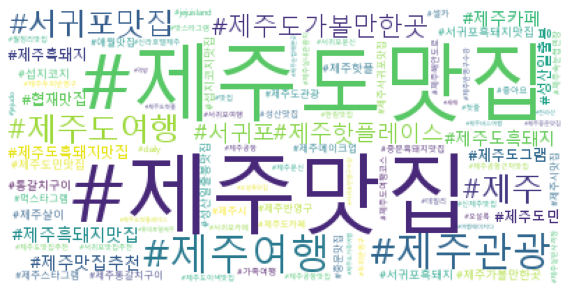

In [155]:
wordcloud = WordCloud(font_path = font_path,
            background_color = 'white',
            max_words = 100).generate_from_frequencies(tags_counts_selected)

plt.figure(figsize = (10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/word_cloud_class.png')